In [0]:
! uptime

 09:36:43 up  7:18,  0 users,  load average: 2.11, 2.35, 2.24


## Load tools

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
# base_dir = root_dir + 'fastai-v3/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# Matlab Processing to Pandas
# source: https://github.com/sigopt/stanford-car-classification/blob/master/stanford_cars.py
from scipy.io import loadmat
import numpy as np
from torch.utils.data import Dataset
import torchvision
from enum import Enum
import os
from PIL import Image
import math

In [0]:
# FastAI code
# source: https://www.kaggle.com/khursani8/fast-ai-ootb-cutout-efficientnet
from fastai.vision import *
from fastai.metrics import *
PATH = Path('')

In [0]:
from efficientnet_pytorch import EfficientNet

In [0]:
!pip install efficientnet_pytorch

## Get data

In [0]:
! wget http://imagenet.stanford.edu/internal/car196/car_ims.tgz

--2019-06-17 03:45:09--  http://imagenet.stanford.edu/internal/car196/car_ims.tgz
Resolving imagenet.stanford.edu (imagenet.stanford.edu)... 171.64.68.16
Connecting to imagenet.stanford.edu (imagenet.stanford.edu)|171.64.68.16|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1956628579 (1.8G) [application/x-gzip]
Saving to: ‘car_ims.tgz’

car_ims.tgz         100%[===================>]   1.82G  10.3MB/s    in 3m 15s  

2019-06-17 03:48:25 (9.56 MB/s) - ‘car_ims.tgz’ saved [1956628579/1956628579]



In [0]:
! tar -xvzf car_ims.tgz

car_ims/
car_ims/011348.jpg
car_ims/014416.jpg
car_ims/014864.jpg
car_ims/006611.jpg
car_ims/015256.jpg
car_ims/010508.jpg
car_ims/015983.jpg
car_ims/007051.jpg
car_ims/008684.jpg
car_ims/008123.jpg
car_ims/004144.jpg
car_ims/005704.jpg
car_ims/012988.jpg
car_ims/009763.jpg
car_ims/010169.jpg
car_ims/015637.jpg
car_ims/007397.jpg
car_ims/015190.jpg
car_ims/007842.jpg
car_ims/007430.jpg
car_ims/003289.jpg
car_ims/014077.jpg
car_ims/011729.jpg
car_ims/006270.jpg
car_ims/005365.jpg
car_ims/000849.jpg
car_ims/009302.jpg
car_ims/004282.jpg
car_ims/016085.jpg
car_ims/008930.jpg
car_ims/008542.jpg
car_ims/004525.jpg
car_ims/004957.jpg
car_ims/004253.jpg
car_ims/008234.jpg
car_ims/004986.jpg
car_ims/008593.jpg
car_ims/016054.jpg
car_ims/009806.jpg
car_ims/009474.jpg
car_ims/005413.jpg
car_ims/005861.jpg
car_ims/000898.jpg
car_ims/006974.jpg
car_ims/006506.jpg
car_ims/003258.jpg
car_ims/014701.jpg
car_ims/002418.jpg
car_ims/007346.jpg
car_ims/007893.jpg
car_ims/015141.jpg
car_ims/009015.jpg
car

In [0]:
! wget http://imagenet.stanford.edu/internal/car196/cars_annos.mat

--2019-06-17 02:39:39--  http://imagenet.stanford.edu/internal/car196/cars_annos.mat
Resolving imagenet.stanford.edu (imagenet.stanford.edu)... 171.64.68.16
Connecting to imagenet.stanford.edu (imagenet.stanford.edu)|171.64.68.16|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 394471 (385K) [text/plain]
Saving to: ‘cars_annos.mat’

cars_annos.mat      100%[===================>] 385.23K   442KB/s    in 0.9s    

2019-06-17 02:39:40 (442 KB/s) - ‘cars_annos.mat’ saved [394471/394471]



## Load data

In [0]:
validation_percentage = 0
data_subset = 1

In [0]:

# logging.info("preprocessing data")
data_struct = loadmat('cars_annos.mat')
annotations = data_struct['annotations']
annotations_labels = annotations['class']

validation_struct = np.array([])
training_struct = np.array([])

unique_labels = np.unique(annotations_labels)


In [0]:
for label in unique_labels:
    class_label = label[0][0]
    class_struct = annotations[annotations['class'] == class_label]
    class_struct = np.reshape(class_struct, (class_struct.shape[0], 1))
    np.random.shuffle(class_struct)

    #subset data
    class_struct = class_struct[:math.ceil(class_struct.shape[0] * data_subset)]

    # split data into training and validation
    class_struct_shape = class_struct.shape
    validation_split = math.floor(class_struct_shape[0] * validation_percentage)
    validation_data_points = class_struct[:validation_split]
    training_data_points = class_struct[validation_split:]

    if validation_struct.shape[0] == 0:
        validation_struct = validation_data_points
    else:
        validation_struct = np.append(validation_struct, validation_data_points)

    if training_struct.shape[0] == 0:
        training_struct = training_data_points
    else:
        training_struct = np.append(training_struct, training_data_points)

# shuffle training and validation data
validation_struct = np.reshape(validation_struct, (validation_struct.shape[0],1))
np.random.shuffle(validation_struct)

training_struct = np.reshape(training_struct, (training_struct.shape[0],1))
np.random.shuffle(training_struct)

# return training_struct, validation_struct, unique_labels

In [0]:
training_struct.shape, validation_struct.shape, unique_labels.shape

((16185, 1), (0, 1), (196,))

In [0]:
training_struct

array([[(array(['car_ims/002871.jpg'], dtype='<U18'), array([[106]], dtype=uint8), array([[27]], dtype=uint8), array([[933]], dtype=uint16), array([[440]], dtype=uint16), array([[36]], dtype=uint8), array([[0]], dtype=uint8))],
       [(array(['car_ims/015244.jpg'], dtype='<U18'), array([[76]], dtype=uint8), array([[50]], dtype=uint8), array([[431]], dtype=uint16), array([[340]], dtype=uint16), array([[185]], dtype=uint8), array([[1]], dtype=uint8))],
       [(array(['car_ims/010604.jpg'], dtype='<U18'), array([[64]], dtype=uint8), array([[160]], dtype=uint8), array([[420]], dtype=uint16), array([[347]], dtype=uint16), array([[129]], dtype=uint8), array([[0]], dtype=uint8))],
       [(array(['car_ims/006954.jpg'], dtype='<U18'), array([[43]], dtype=uint8), array([[75]], dtype=uint8), array([[611]], dtype=uint16), array([[471]], dtype=uint16), array([[85]], dtype=uint8), array([[1]], dtype=uint8))],
       ...,
       [(array(['car_ims/004423.jpg'], dtype='<U18'), array([[53]], dtype=ui

In [0]:
df = pd.DataFrame(columns=['relative_im_path', 'class', 'test'])
for i in range(0, training_struct.shape[0]):
  row = pd.DataFrame({'relative_im_path': training_struct[i][0][0][0]
                    , 'class': training_struct[i][0][5][0][0]
                    , 'test': training_struct[i][0][6][0][0]}
                  , index = [0])
  df = df.append(row)
df = df.reset_index(drop = True)
df.shape

(16185, 3)

In [0]:
df.nunique()

relative_im_path    16185
class                 196
test                    2
dtype: int64

## View photos

In [0]:
import os
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Activation, Dropout, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers, applications
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
from keras import backend as K 

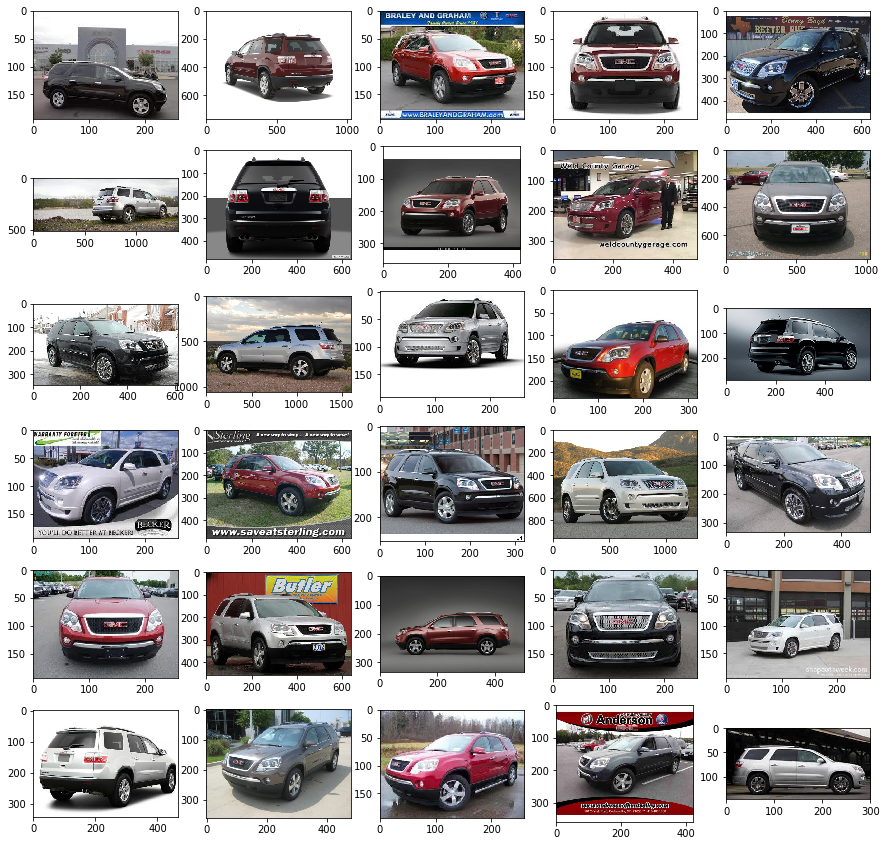

In [0]:
# pictures of people/hands exist
# Example of images for category_id = 400
# img_names = df_train_file_cat[df_train_file_cat['category_id']=='400']['file_name'][:30]
img_names = df[df['class']==121]['relative_im_path'][:30]
# img_names = df_train[df_train.index.isin(a)]['file_name'][:30] # check random subset

plt.figure(figsize=[15,15])
i = 1
for img_name in img_names:
    img = cv2.imread("%s" % img_name)[...,[2, 1, 0]]
    plt.subplot(6, 5, i)
    plt.imshow(img)
    i += 1
plt.show()

In [0]:
df.head(2)

,relative_im_path,class,test
0,car_ims/002871.jpg,36,0
1,car_ims/015244.jpg,185,1


In [0]:
df_train_file_cat = df.query("test == 0")[['relative_im_path', 'class']]
test_img_df = df.query("test == 1")[['relative_im_path', 'class']]
df_train_file_cat.shape, test_img_df.shape

((8144, 2), (8041, 2))

In [0]:
%%time
# Try Oversampling

res = None
sample_to = df_train_file_cat['class'].value_counts().max() # which is 68

for grp in df_train_file_cat.groupby('class'):
    n = grp[1].shape[0]
    additional_rows = grp[1].sample(0 if sample_to < n  else sample_to - n, replace=True)
    rows = pd.concat((grp[1], additional_rows))
    
    if res is None: res = rows
    else: res = pd.concat((res, rows))

CPU times: user 294 ms, sys: 763 µs, total: 295 ms
Wall time: 297 ms


In [0]:
res['class'].value_counts()[:10]

196    68
73     68
71     68
70     68
69     68
68     68
67     68
66     68
65     68
64     68
Name: class, dtype: int64

## Model

In [0]:
model_name = 'efficientnet-b3'
def getModel(pret):
    model = EfficientNet.from_pretrained(model_name)
#     model._bn1 = nn.Identity()
    model._fc = nn.Linear(1536,data.c)
    return model

In [0]:
src = (
ImageList.from_df(df=res,path=PATH)
#     .use_partial_data(0.5)
    .split_by_rand_pct(0.2)
    .label_from_df()
    .add_test(ImageList.from_df(df=test_img_df,path=PATH))
)

In [0]:
# Load data to fit fastai format, with transforms
data = (
    src
    .transform(get_transforms(xtra_tfms=cutout()),size=224)
    .databunch(bs=64)
    .normalize(imagenet_stats)
)

In [0]:
learn = Learner(data,getModel(False),metrics=[error_rate,top_k_accuracy],model_dir='model',loss_func=LabelSmoothingCrossEntropy()).mixup().to_fp16()

Loaded pretrained weights for efficientnet-b3


In [0]:
learn.fit_one_cycle(7)

epoch,train_loss,valid_loss,error_rate,top_k_accuracy,time
0,2.412565,1.596381,0.191370,0.957599,05:29
1,2.783507,2.381407,0.418011,0.844278,05:30
2,2.646049,2.093328,0.322326,0.891932,05:30
3,2.403718,1.455913,0.142214,0.969981,05:31
4,2.202821,1.259778,0.085929,0.983114,05:28


KeyboardInterrupt: ignored

In [0]:
learn.export('/content/export.pkl')
subprocess.run("cp export.pkl '/content/gdrive/My Drive/Colab Notebooks/export_cars.pkl'", shell=True)

CompletedProcess(args="cp export.pkl '/content/gdrive/My Drive/Colab Notebooks/export_cars.pkl'", returncode=0)

In [0]:
learn.validate(learn.data.valid_dl)[1].item()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


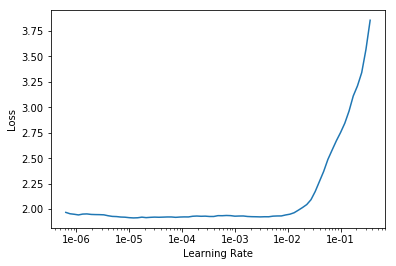

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
learn.unfreeze()

In [0]:
learn.fit_one_cycle(10,max_lr=8e-5)

epoch,train_loss,valid_loss,error_rate,top_k_accuracy,time
0,1.939227,1.735660,0.182979,0.868085,01:00
1,1.938575,1.718623,0.174468,0.868085,01:01
2,1.908796,1.700208,0.174468,0.863830,01:01
3,1.902671,1.688339,0.174468,0.868085,01:01
4,1.899857,1.678984,0.165957,0.868085,01:02
5,1.894454,1.678268,0.178723,0.868085,01:01
6,1.879956,1.675607,0.174468,0.872340,01:01
7,1.868470,1.671513,0.182979,0.872340,01:01
8,1.875598,1.671828,0.182979,0.872340,01:02
9,1.871489,1.672300,0.182979,0.872340,01:01


In [0]:
learn.export('/content/export.pkl')
subprocess.run("cp export.pkl '/content/gdrive/My Drive/Colab Notebooks/export_carsunfreeze.pkl'", shell=True)

CompletedProcess(args="cp export.pkl '/content/gdrive/My Drive/Colab Notebooks/export_carsunfreeze.pkl'", returncode=0)

## Results

In [0]:
# Load model
subprocess.run("cp '/content/gdrive/My Drive/Colab Notebooks/export_cars.pkl' export.pkl", shell=True)
learn = load_learner('/content')
learn.data = data

In [0]:
# Error rate of loaded model
learn.validate(learn.data.valid_dl)[1].item()

0.064540334045887

In [0]:
preds,y = learn.get_preds(DatasetType.Test)

In [0]:
preds.shape

torch.Size([8041, 196])

In [0]:
results = torch.topk(preds,1)

In [0]:
out = []
for i in results[1].numpy():
    temp = ""
    for j in i:
        temp += (" "+str(data.classes[j])) 
    out.append(temp)

In [0]:
# test_img_df["predicted"] = out
# test_img_df.head()
test_img_df["predicted"] = out
test_img_df.head()

,relative_im_path,class,predicted
1,car_ims/015244.jpg,185,185
3,car_ims/006954.jpg,85,85
4,car_ims/007591.jpg,93,93
5,car_ims/011532.jpg,140,185
6,car_ims/001593.jpg,20,20


In [0]:
test_img_df['predicted'] = test_img_df['predicted'].astype(int)
test_img_df['class'] = test_img_df['class'].astype(int)

In [0]:
sum(test_img_df["predicted"] == test_img_df["class"])/8041

0.86643452306927

In [0]:
test_img_df.to_csv("/content/gdrive/My Drive/Colab Notebooks/submission_201906170541.csv",index=False)